<a href="https://colab.research.google.com/github/tanvikurade/EDA-IRIS/blob/main/Avocado%20Price%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#importing libraries
import sklearn
import pandas as pd
import seaborn as sns
import keras as K
import keras.layers as Dense
import keras.models as Sequential
import keras.optimizers as Adam
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Avocado Price/avocado.csv")

In [35]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [36]:
df.shape

(18249, 14)

In [37]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [38]:
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


In [39]:
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64


In [40]:
len(df.region.unique())

54

In [41]:
df.groupby('region').size() 

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [42]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


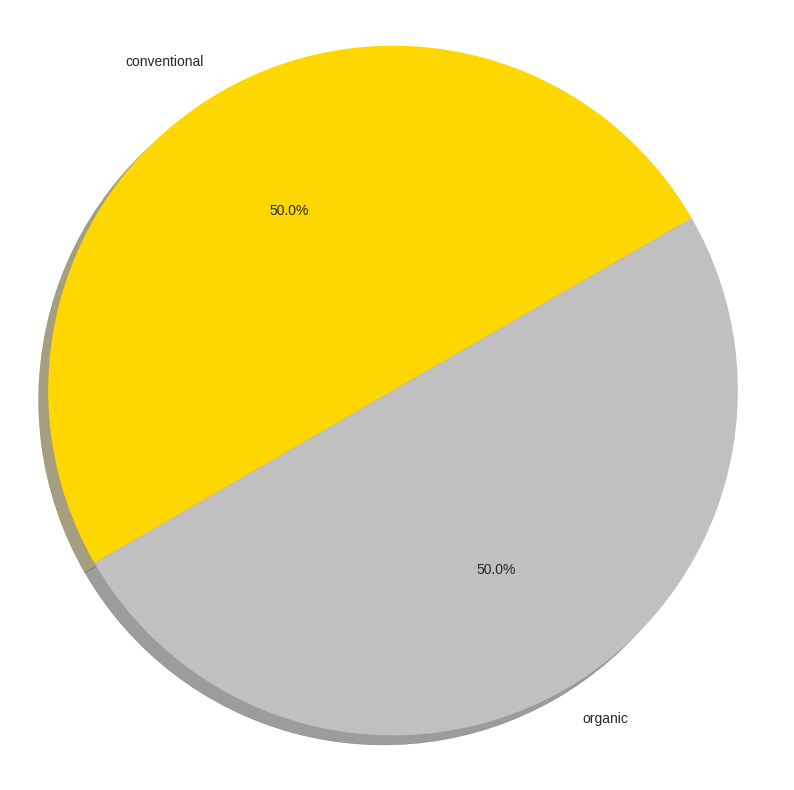

In [43]:
labels = ['conventional', 'organic']

fig, ax = plt.subplots(figsize=(10,10))
colors = ['gold', 'silver']
ax.pie(df['type'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
#Theme
ax.axis('equal')
plt.show()

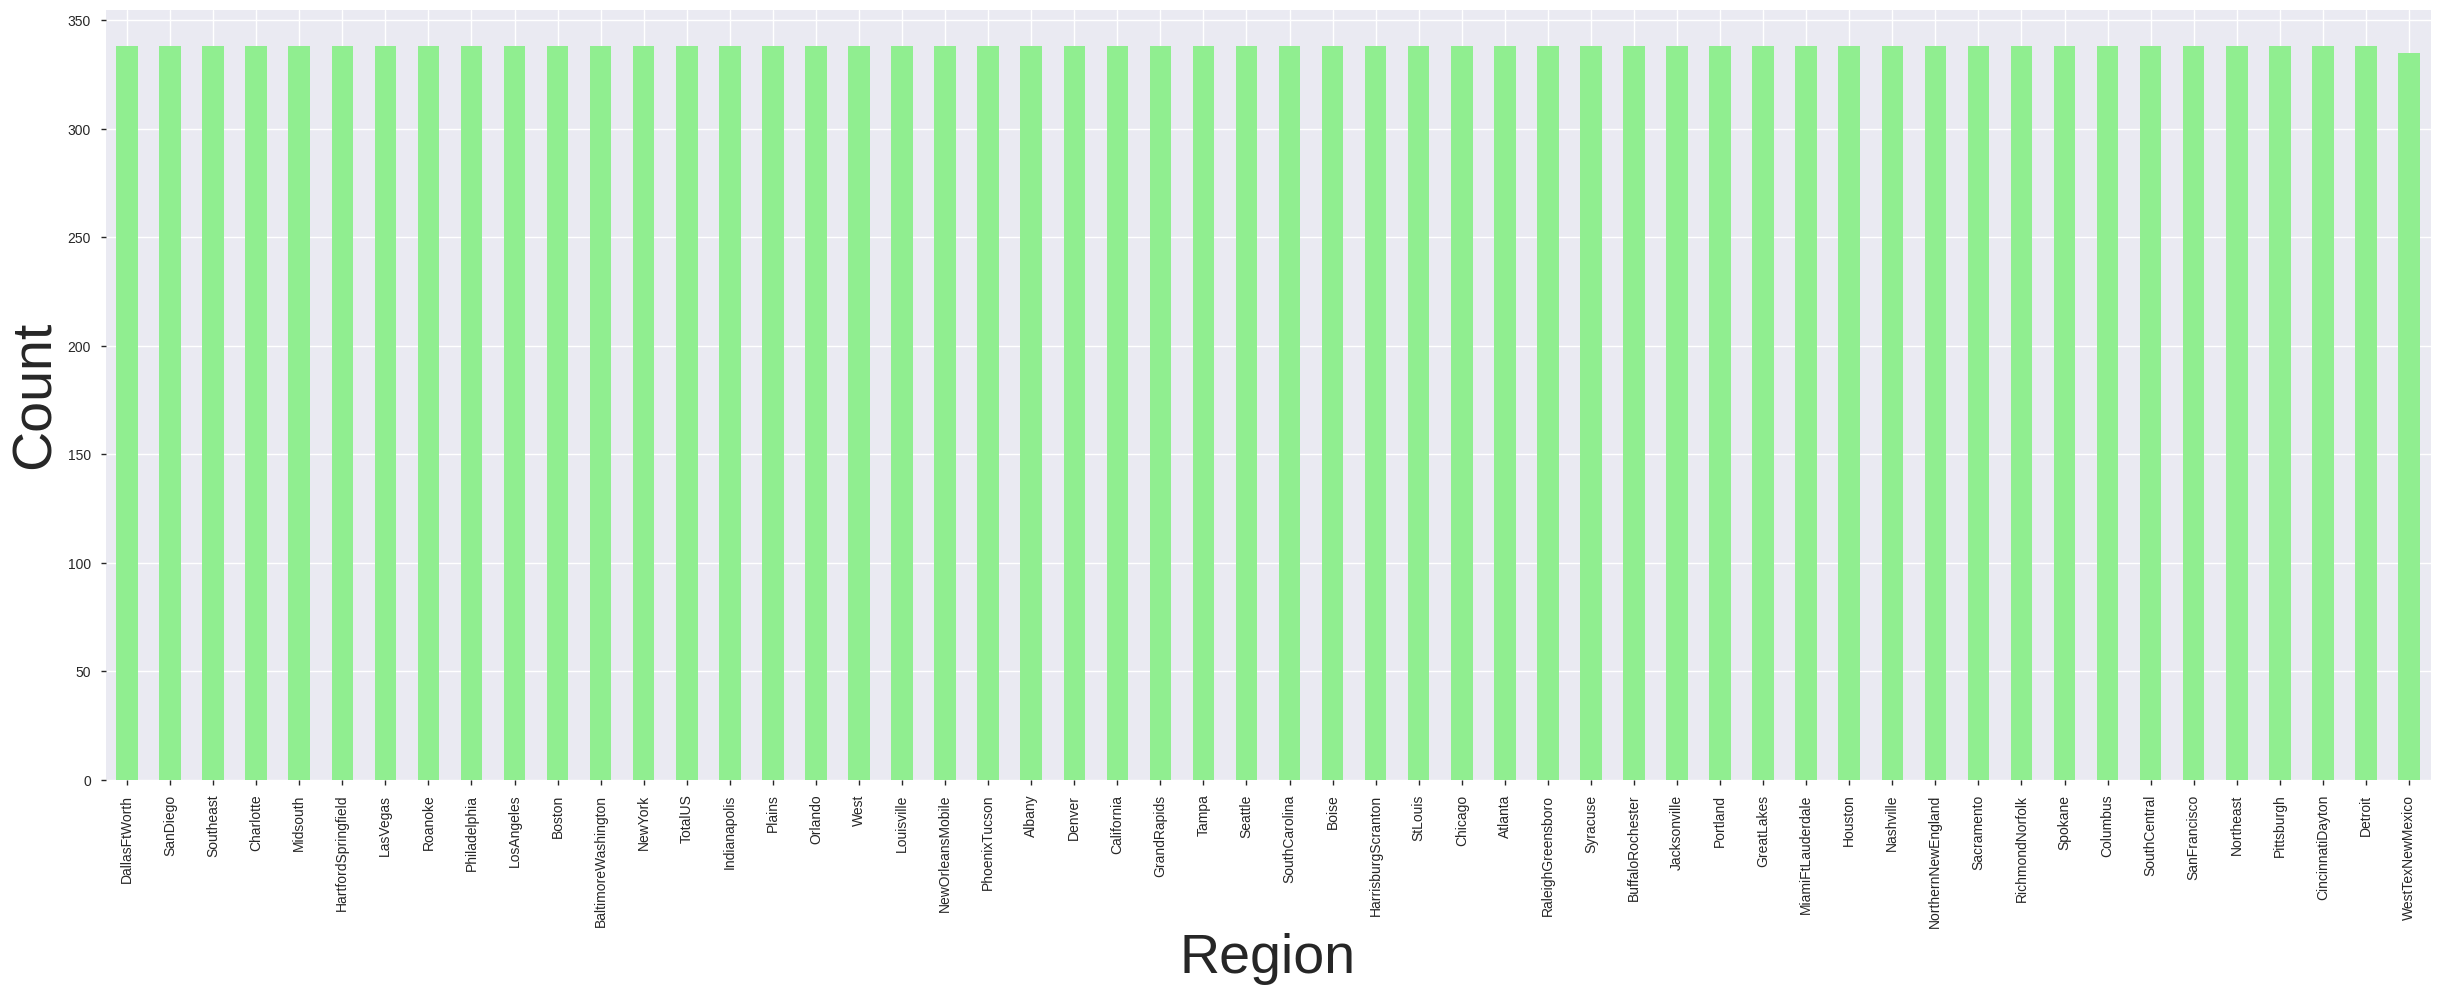

In [44]:
plt.figure(figsize=(30,10))
df['region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Region', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.show()

In [45]:
# Turning object to int
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]  = pd.Categorical(content).codes+1

In [46]:
df.dtypes

Unnamed: 0        int64
Date              int16
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type               int8
year              int64
region             int8
dtype: object

Text(0.5, 1.0, 'Correlation ')

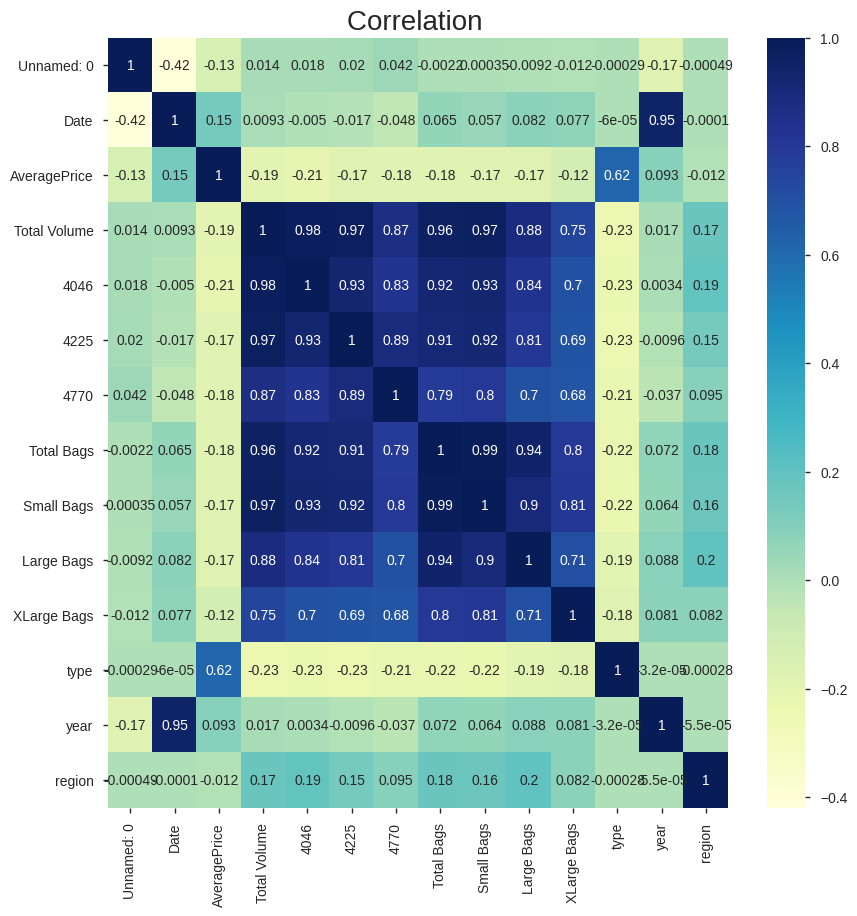

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           annot=True,
           cmap='YlGnBu')
plt.title('Correlation ', fontsize=20)

In [48]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(14599, 3650, 14599, 3650)

In [50]:
#Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)
y_preds

reg.score(X_test, y_test)

0.9079860672329563

In [51]:
y_preds

array([0.981 , 0.9931, 1.4117, ..., 0.5793, 1.7123, 2.1753])

In [52]:
#Gradreint boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)
y_preds

reg.score(X_test, y_test)

0.7694574727541903

In [53]:
#xgboost
from xgboost import XGBRegressor

np.random.seed(42)
reg = XGBRegressor()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

reg.score(X_test,y_test)

[07:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7648350953311791

In [54]:
predictions

array([1.0993578, 1.081262 , 1.5559003, ..., 0.7128608, 1.7114781,
       1.9847393], dtype=float32)

In [55]:
len(predictions)

3650